In [1268]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
from IPython.display import display, HTML, IFrame
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')


In [1269]:
folder = ['compsci-data','jbt-data', 'brands-data-400', 'brands-data-100']
#folder = ['jbt-data']

In [1273]:


agg_list = []
full_list = []
test_list = []
for f in folder:
    agg =  pd.read_csv('{}/agg.csv'.format(f))
    agg['type'] = f.split('-')[0]
    agg.set_index('id')
    agg_list.append(agg)
   
    full = pd.read_csv('{}/full.csv'.format(f))
    full['type'] = f.split('-')[0]
    full.set_index('id')
    full_list.append( full)
    test = pd.read_csv('{}/test.csv'.format(f))
    test['type'] = f.split('-')[0]
    test.set_index('id')
    test_list.append (test)
aggregated = pd.concat(agg_list)
aggregated.to_csv('foo.csv')
full = pd.concat(full_list)
test_questions = pd.concat(test_list)
aggregated = aggregated[aggregated['_unit_state'] == 'finalized']


### Quality

In [1276]:
conf = aggregated[['id','text_readable', 'label:confidence', 'label']]
display(conf[['label:confidence']].describe())
print('Sentences 85%> confidence')
top_conf = conf[conf['label:confidence'] >= 0.85]
display(top_conf.count())
print('Sentences with a confidence between 0.60 and 0.85')
avg_conf = conf[(conf['label:confidence']< 0.85) & (conf['label:confidence']>= 0.60)]
display(avg_conf.count())
print('Sentence with <60% confidence')
worst_conf = conf[conf['label:confidence'] < 0.6]
display(worst_conf.count())

print('Useable sentences (conf >= 60%)')
useable = conf[conf['label:confidence'] >= 0.6]
display(useable.count())




def print_info(data):
    avg = pd.merge(data, full, suffixes=['_l', '_r'], on=['id'], how='left')[['id', 'text_readable_r', 'label:confidence', 'label_l', 'label_r', '_trust','a','b', 'type']].sort_values(['label:confidence', 'label_l' ,'id'])
    renamed_avg = avg.rename(columns={'label_l' : 'assigned', 'label_r' : 'proposed'})
    display( renamed_avg.style.background_gradient(cmap=plt.cm.get_cmap('RdYlGn'),subset=['label:confidence']))
    display(renamed_avg.describe())
    renamed_avg['counter'] = renamed_avg['proposed']
    avg = renamed_avg[['counter','assigned','proposed']].groupby([ 'assigned', 'proposed']).count()
   
    display(avg)


label:confidence
count       1500.000000
mean           0.851842
std            0.188090
min            0.335800
25%            0.672300
50%            1.000000
75%            1.000000
max            1.000000

Sentences 85%> confidence


id                  884
text_readable       884
label:confidence    884
label               884
dtype: int64

Sentences with a confidence between 0.60 and 0.85


id                  536
text_readable       536
label:confidence    536
label               536
dtype: int64

Sentence with <60% confidence


id                  80
text_readable       80
label:confidence    80
label               80
dtype: int64

Useable sentences (conf >= 60%)


id                  1420
text_readable       1420
label:confidence    1420
label               1420
dtype: int64

**The hardest sentences**

In [1249]:
print_info(worst_conf)


label:confidence     _trust
count         66.000000  66.000000
mean           0.412705   0.854379
std            0.072775   0.068066
min            0.341200   0.727300
25%            0.356000   0.804550
50%            0.365050   0.848500
75%            0.498300   0.892900
max            0.524000   1.000000

counter
assigned proposed         
BETTER   BETTER          4
         OTHER           4
         WORSE           4
NONE     BETTER          4
         NONE            8
         OTHER           4
         WORSE           4
OTHER    BETTER          3
         NONE            9
         OTHER          11
         WORSE           4
WORSE    BETTER          2
         OTHER           2
         WORSE           3

**Average sentences**

In [1277]:
print_info(avg_conf)

label:confidence       _trust
count       1639.000000  1632.000000
mean           0.675035     0.859635
std            0.035366     0.078630
min            0.600000     0.700000
25%            0.651900     0.800000
50%            0.669900     0.857100
75%            0.690200     0.909100
max            0.812500     1.000000

counter
assigned proposed         
BETTER   BETTER        178
         NONE           41
         OTHER          31
         WORSE          14
NONE     BETTER         34
         NONE          570
         OTHER         216
         WORSE          26
OTHER    BETTER         13
         NONE           95
         OTHER         253
         WORSE          15
WORSE    BETTER         13
         NONE           18
         OTHER          15
         WORSE         100

**Easy sentences**

In [1278]:
print_info(top_conf)

label:confidence       _trust
count            2711.0  2693.000000
mean                1.0     0.856815
std                 0.0     0.076927
min                 1.0     0.700000
25%                 1.0     0.791700
50%                 1.0     0.850000
75%                 1.0     0.900000
max                 1.0     1.000000

counter
assigned proposed         
BETTER   BETTER        602
NONE     NONE         1760
OTHER    OTHER         119
WORSE    BETTER          2
         WORSE         210

**All Sentences**

In [1252]:
print_info(conf)

label:confidence       _trust
count       1517.000000  1517.000000
mean           0.855163     0.867678
std            0.184879     0.069475
min            0.341200     0.714300
25%            0.671600     0.818200
50%            1.000000     0.871000
75%            1.000000     0.909100
max            1.000000     1.000000

counter
assigned proposed         
BETTER   BETTER        216
         NONE           16
         OTHER          14
         WORSE           6
NONE     BETTER         22
         NONE          872
         OTHER          80
         WORSE          11
OTHER    BETTER          6
         NONE           41
         OTHER         124
         WORSE           8
WORSE    BETTER          7
         NONE            5
         OTHER           4
         WORSE          85

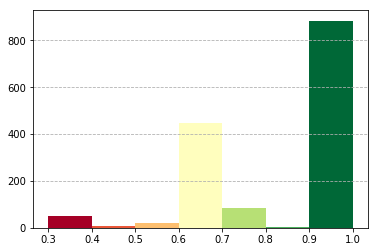

In [1279]:
color_map = plt.cm.get_cmap('RdYlGn')
#plt.title('Confidence of Labeling')
plt.grid(axis='y', linestyle='dashed')
ticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.xticks(ticks)
n, bins, patches = plt.hist(
    aggregated['label:confidence'], bins=ticks, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', color_map(c))
plt.show()

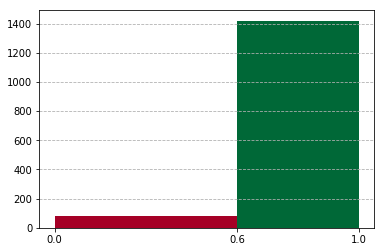

In [1280]:
color_map = plt.cm.get_cmap('RdYlGn')
#plt.title('Confidence of Labeling')
plt.grid(axis='y', linestyle='dashed')
ticks = [0.0,  0.6, 1]
plt.xticks(ticks)
n, bins, patches = plt.hist(
    aggregated['label:confidence'], bins=ticks, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', color_map(c))
plt.show()

## Results

**Label Distribution**

In [1281]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

def show_dist(labels):

    plt.figure(figsize=plt.figaspect(1))
    plt.pie(
        labels.value_counts().values,
        labels=labels.value_counts().keys().tolist(),
        radius=2,
        autopct=make_autopct(labels.value_counts().values))
    plt.show()


**All sentences**

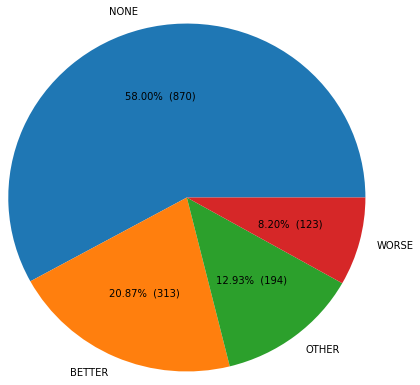

In [1282]:
show_dist(aggregated['label'])

**Sentences with conf > 60**

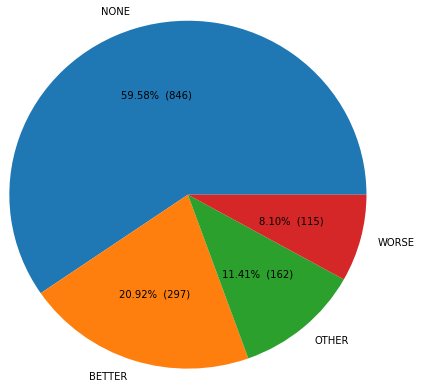

In [1283]:
show_dist(useable['label'])

## Test Sentences

In [1284]:
display(test_questions[['_pct_missed']].describe())

_pct_missed
count   181.000000
mean      0.261768
std       0.216575
min       0.000000
25%       0.110000
50%       0.210000
75%       0.370000
max       0.970000

In [1259]:
print("Amount of test-questions without failures:")
display(test_questions[test_questions['_pct_missed'] == 0]['_pct_missed'].count())

print("Amount of test questions missed 50%>")
display(test_questions[test_questions['_pct_missed'] >= 0.5]['_pct_missed'].count())

print("Amount of test questions missed 80%>")
display(test_questions[test_questions['_pct_missed'] >= 0.8]['_pct_missed'].count())

Amount of test-questions without failures:


4

Amount of test questions missed 50%>


4

Amount of test questions missed 80%>


1

In [1260]:
highly_missed = test_questions[test_questions['_pct_missed'] >= 0.6]
proj = highly_missed[['id', 'text_readable', '_pct_missed', '_judgments', 'label_gold', 'type' ]]
proj.sort_values(['_pct_missed','id'])#.style.background_gradient(cmap=plt.cm.get_cmap('RdYlGn_r'),subset=['_pct_missed'])

id                                      text_readable  \
4  N2239679026       So, is *google* Plus better than §facebook$?   
8  I1350818111  Is Netflix better than *hulu* Plus or §amazon$...   
0  P2533877672  The Jimmy Dean *sandwich* had far better §saus...   

   _pct_missed  _judgments label_gold type  
4         0.69          36       NONE  jbt  
8         0.71          38       NONE  jbt  
0         0.86          35      OTHER  jbt

**Contested Test-Questions**

In [1261]:
contested = test_questions[test_questions['_pct_contested'] != 0]
display(contested[['_pct_missed', '_judgments', '_pct_contested']].describe())

_pct_missed  _judgments  _pct_contested
count    13.000000   13.000000       13.000000
mean      0.291538   28.461538        0.040900
std       0.248959    4.483588        0.011971
min       0.000000   21.000000        0.027800
25%       0.120000   25.000000        0.032300
50%       0.190000   28.000000        0.038500
75%       0.370000   31.000000        0.041700
max       0.860000   36.000000        0.071400

In [1262]:
display(contested[['id', 'text_readable', '_pct_missed', '_pct_contested', '_judgments', 'label_gold','type' ]].sort_values([ '_pct_contested', '_pct_missed']))

id                                      text_readable  \
4   N2239679026       So, is *google* Plus better than §facebook$?   
40  S2969144027  Unfortunately the crimes get progressively wor...   
45  Q2671064448  The *restaurant* serves decent dinner and brea...   
3   L1806350316  *nixon* was better in the second, gerald ford ...   
47  O2379912802  That's the primary reason I traded my FWD Ford...   
49  P2496394204  The food was fine; my husband liked the *sausa...   
30   E575027004  Detra Denay Davis - better known by her middle...   
43   E697369047  Faster-paced sports, such as *basketball* and ...   
26  J1483527500  It wasn't very *cider*-like, but more like a s...   
7    E653701837  Enjoy stations such as *fox* 101, §espn$ 1380 ...   
37  S3049627063  We have a long, rich history of providing supe...   
0   P2533877672  The Jimmy Dean *sandwich* had far better §saus...   
2    F805035826  *georgia* TECH 56, §virginia$ 20 : The Cavalie...   

    _pct_missed  _pct_contested  _judgments   label_gold type  
4          0.69          0.0278          36         NONE  jbt  
40         0.09          0.0303          33  OTHER\nNONE  jbt  
45         0.19          0.0323          31  OTHER\nNONE  jbt  
3          0.23          0.0323          31       BETTER  jbt  
47         0.36          0.0357          28        WORSE  jbt  
49         0.37          0.0370          27         NONE  jbt  
30         0.19          0.0385          26         NONE  jbt  
43         0.00          0.0400          25  OTHER\nNONE  jbt  
26         0.12          0.0400          25  OTHER\nNONE  jbt  
7          0.12          0.0417          24         NONE  jbt  
37         0.14          0.0476          21         NONE  jbt  
0          0.86          0.0571          35        OTHER  jbt  
2          0.43          0.0714          28         NONE  jbt

In [1263]:
from orderedset import OrderedSet

aggregated['pair'] = aggregated.apply(lambda row: ', '.join(sorted([row['a'], row['b']])),axis=1)

In [1264]:
#display(aggregated[['pair', 'id']].groupby(['pair']).count())

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(aggregated[['a','b', 'id']].groupby(['a','b']).count())
    
    #f = np.append(aggregated['a'].values ,aggregated['b'].values)
    #print('Objects')
    #display(pd.value_counts(f, sort=True).to_frame())
    #print('Pairs')
    #display(pd.value_counts(aggregated['pair'].values,sort=True).to_frame())


id
a            b               
amazon       facebook       4
             hulu           9
             itunes         5
             youtube        3
baseball     basketball     2
             golf           3
             hockey         1
             softball       6
             tennis         3
basketball   golf           6
             hockey         2
             tennis         2
beer         champagne      2
             cider          4
             juice          3
             soda           1
             tea            5
bread        pasta          2
             pizza          1
             potato         2
             sausage        2
             soup           1
             steak          4
bus          truck          2
california   carolina       3
             georgia        2
             michigan       9
             missouri       6
             oregon         1
             pennsylvania   5
             virginia       4
carolina     michigan       6
             missouri       7
             pennsylvania   2
chocolate    soda           4
coffee       juice          3
concrete     cement         5
             rubber         1
             timber         3
ds           ps2            1
             ps3            2
             psp            3
facebook     youtube        4
fishing      camping        4
             swimming       6
football     baseball       6
             basketball     8
             golf           2
             hockey         2
             lacrosse       4
             tennis         2
             volleyball     2
forest       timber         2
fox          cnn            6
             espn           4
georgia      carolina       6
             michigan       2
             missouri       3
             oregon         4
golf         hockey         3
             tennis         5
google       amazon         3
             facebook       2
             itunes         2
             youtube        2
harvard      cornell        2
             dartmouth      5
             mit            7
             princeton      1
             stanford       4
hockey       lacrosse       4
holiday      birthday       1
             wedding        4
iphone       ipod           3
juice        cider          5
             soda           3
kennedy      nixon          2
             reagan         1
knife        pistol         5
laptop       iphone         1
             ipod           3
lumber       plywood        1
metal        aluminum       4
             concrete       4
             plywood        1
             stone          3
michigan     missouri       2
             oregon         3
             pennsylvania   1
milk         beer           2
             juice          5
             soda           3
             tea            1
mobile       laptop         2
             wallet         4
mouse        rat            5
paint        chalk          3
             pen            1
phone        ipod           2
             laptop         4
pizza        pasta          2
             sandwich       3
             sausage        3
             steak          3
plastic      cement         1
             concrete       3
             wood           3
playstation  gamecube       5
             wii            3
ps2          gamecube       3
ps3          ps2            3
psp          ps3            6
reagan       nixon          2
restaurant   cafe           6
rubber       cement         2
             foam           2
sandwich     sausage        7
             steak          5
soup         pasta          1
             pizza          4
             sandwich       3
stanford     mit            3
steel        aluminum       6
             concrete       2
             plywood        2
             stone          1
stone        concrete       3
             timber         3
suv          jeep           4
             minivan        5
swimming     skiing         2
tea          chocolate      3
       

In [1265]:
print('--')

--
